In [1]:
import numpy as np
from scipy import stats
import scipy.stats
from scipy.stats import shapiro
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import omni_normtest

___ 
# <span style="color:red">문제 1</span>
- #### 동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며, 뒷면이 60번 나왔다.
- #### 이 동전은 정상인가를 유의수준 a=0.05로써 검정하라.
- #### 정상적인 동전을 던질 때, 앞면이 나올 확률은 50%이다.
- #### 147page

### 문제풀이
    1. 귀무가설 : 동전을 던질 때, 앞면이 나올 확률은 50% 이다.
    2. 대립가설 : 동전을 던질 때, 앞면이 나올 확률은 50%가 아니다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
    5. 분석 결과 해석

In [2]:
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count, n_obs, value)

print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

1 Proportion test
z:-2.041
p:0.041


### 결과
    1. p-value의 값이 유의수준인 0.05보다 작으므로 귀무가설을 기각할 수 있다.
    2. 따라서 "동전을 던질 때, 앞면이 나올 확률은 50%가 아니다"라는 대립가설을 채택할 수 있다.

___
# <span style="color:red">문제 2</span>
- #### 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.
- #### 두 공정의 불량률이 같다고 할 수 있는가? (유의수준 a = 0.05)
- #### 공장 A : N1 = 1200, X1 = 14
- #### 공장 B : N2 = 1200, X2 - 5
- #### 151page

### 문제풀이
    1. 귀무가설 : 두 공정의 불량률은 같다.
    2. 대립가설 : 두 공정의 불량률은 같지 않다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
    5. 분석 결과 해석

In [3]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

stat, pval = proportions_ztest(count, nobs)

print("2 Proportion")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

2 Proportion
z:2.073
p:0.038


### 결과
    1. p-value의 값이 유의수준인 0.05보다 작으므로 귀무가설을 기각할 수 있다.
    2. 따라서 "두 공정의 불량률은 같지 않다"라는 대립가설을 채택할 수 있다.

___ 
# <span style="color:red">문제 3</span>
- #### 노트북 컴퓨터의 6가지 제품(A, B, C, D, E, F)에 대하여 7가지 제품의 이미지를 중복 선택할 수 있도록 32명의 소비자를 대상으로 설문조사한 Table이다.
- #### 각 제품의 이미지에 대한 차이가 있겠는가? (유의수준 : 0.05)
- #### 159page

### 문제풀이
    1. 귀무가설 : 각 제품의 이미지에 대해 차이가 없다.
    2. 대립가설 : 각 제품의 이미지에 대해 차이가 있다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
       검정에 이용된 카이제곱 검정은 두 집단의 분류된 범주가 동일한 비율로 분류되었는지를 검정하고자 하는 방법
    5. 분석 결과 해석

In [4]:
df = pd.DataFrame({"A":[18, 1, 8, 7, 10, 9, 10],"B":[8, 2, 14, 5, 5, 9, 4],"C":[4, 1, 3, 4, 9, 5, 4], \
                   "D":[4, 1, 2, 3, 2, 7, 3], "E":[3, 1, 3, 1, 1, 1, 1], "F":[3, 25, 8, 10, 2, 1, 7]})

chi, pval,dof, expected = stats.chi2_contingency(df.T)

print("chi-square test")
print('chisq : {0:0.3f}'.format(chi))
print("p:{0:0.9f}".format(pval))
print("degree pf freedom:{0}".format(dof))
print("exepted value:\n{}".format(expected.round(3)))

chi-square test
chisq : 98.274
p:0.000000003
degree pf freedom:30
exepted value:
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


### 결과
    1. p-value의 값이 유의수준인 0.05보다 작으므로 귀무가설을 기각할 수 있다.
    2. 따라서 "각 제품의 이미지에 대해 차이가 있다"라는 대립가설을 채택할 수 있다.

___ 
# <span style="color:red">문제 4</span>
- #### 초코칩의 강도와 재료 반죽온도 간의 관계를 분석하기 위한 상관분석을 하세요.
- #### 174page

### 문제풀이
    1. 귀무가설 : 초코칩의 강도와 재료 반죽 온도 간의 관계는 상관성이 없다.
    2. 대립가설 : 초코칩의 강도와 재료 반죽 온도 간의 관계는 상관성이 있다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
    5. 분석 결과 해석

In [5]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print("corr : {0:0.3f}".format(corr))
print("pval : {0:0.6f}".format(pval))

Correlation Analysis
corr : -0.723
pval : 0.000315


### 결과
    1. p-value의 값이 유의수준인 0.05보다 작으므로, 귀무가설을 기각할 수 있다.
    2. 해당 문제에서의 귀무가설은 초코칩의 강도와 재료 반죽 온도간에 상관성이 없다였으므로,
       대립가설인 "초코칩의 강도와 재료 반죽 온도간에 상관성이 있다"를 채택할 수 있다.
    3. 이때, Corr의 값이 -1에 가까운 값을 가지므로 초코칩의 강도와 재료 반죽 온도는 강한 상관성을 가진다고 할 수 있다.
    4. 따라서 초코칩의 강도가 올라갈수록 재료 반죽 온도 또한 상승하는 것을 알 수 있다.

___ 
# <span style="color:red">문제 5</span>
- #### 초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시와 회귀식 도출
- #### 204page

### 문제풀이
    1. 데이터 구성하기
    2. 변수 간의 경향성 파악 - 그래프 분석
    3. 회귀 모델 생성
        - 모델의 적합성 검토 => 분산분석/결정계수 확인
        - 회귀계수 유의성 검토
    4. 오차의 기본 가정 검토
    5. 분석 결과 해석

#### 1) 데이터 구성 및 출력해보기

In [6]:
strength = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1,
            36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
baking_time = [0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 0.7664, 0.742243, 0.751118,
               0.740629, 0.751495, 0.738863, 0.827428, 0.818172, 0.740939, 0.757128, 0.804695, 0.69521, 0.735377]

df_raw = pd.DataFrame({'Strength':strength, 'Baking_time':baking_time})
df_raw.head()

,Strength,Baking_time
0,37.6,0.798922
1,38.6,0.849020
2,37.2,0.816163
3,36.4,0.758266
4,38.6,0.815894


In [7]:
df_raw.describe().round(3)

,Strength,Baking_time
count,20.000,20.000
mean,36.965,0.776
std,1.565,0.041
min,33.000,0.695
25%,36.375,0.742
50%,37.150,0.762
75%,37.725,0.811
max,39.000,0.849


####    2) 변수 간 경향성 파악을 위해 그래프 분석하기
           + 불규칙적인 경향을 갖는다.

<AxesSubplot:xlabel='Strength', ylabel='Baking_time'>

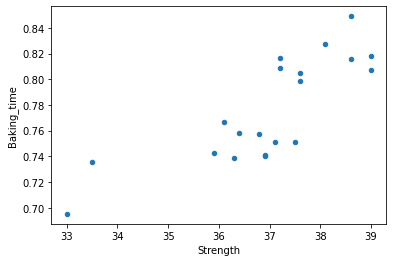

In [8]:
df_raw.plot.scatter(x = 'Strength', y = "Baking_time")

####    3) 상관관계 분석하기 - 상관계수가 0.804로 두 변수 간에는 높은 선형 관계가 있음

In [9]:
df_raw.corr(method="pearson").round(3)

,Strength,Baking_time
Strength,1.000,0.804
Baking_time,0.804,1.000


####    4) 회귀모델 생성하기 - ANOVA 분석

In [10]:
reg_model = smf.ols(formula="Baking_time ~ Strength", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:            Baking_time   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.87
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.95e-05
Time:                        23:39:30   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0026      0.135      0.019      0.9

####    분석 결과  
   + ###### 1. 결정계수(R-Squared : 0.646)  
        + ###### 초코칩의 강도(Strength)의 따른 굽는 시간(Baking_time)의 변동의 64.6% 설명할 수 있음
   + ###### 2. 분산분석 결과(F 분포에 대한 p-value : 0에 근접)  
        + ###### p-value의 값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다고 할 수 있음
   + ###### 3. 잔차의 정규성(Omnibus)
        + ###### p-value의 값이 유의수준 0.05보다 작으므로 귀무가설인 정규성을 갖는다고 할 수 없음.
   + ###### 4. 왜도와 첨도(Skew, Kurtosis)
        + ###### 왜도가 음수의 값을 가지므로, 그래프에서 왼쪽에 치우쳐져 있고, 첨도의 값이 큼에 따라 뾰족하다.
   + ###### 5. 잔차의 독립성(Durbin-Watson)
        + ###### 2(1-p)의 값이 0에 가까움으로, 독립성을 가지지 않는다고 할 수 있다.
   + ###### 6. 정규성 검정(Jarque-Bera)
        + ###### p-value의 값이 유의수준 0.05보다 크므로 귀무가설인 정규성을 갖는다고 할 수 있음.

####    5) y = 0을 기준으로 random하게 분포되어 있으므로 해당 데이터는 등분산성과 정규성을 갖는다고 할 수 있다.

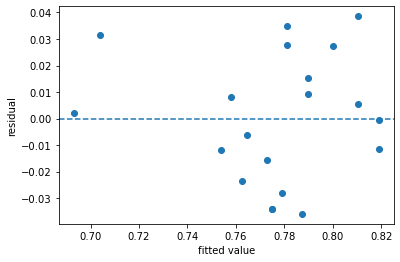

In [11]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

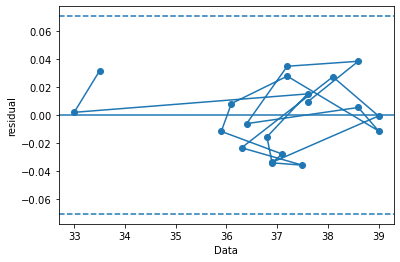

In [12]:
plt.plot(df_raw['Strength'], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle='-')
plt.axhline(y=3*np.std(reg_result.resid), linestyle='--')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle='--')

####    6) p-value의 값이 유의수준 0.05 보다 큰 값을 가지므로 귀무가설인 정규성과 등분산성을 갖는다고 할 수 있다.

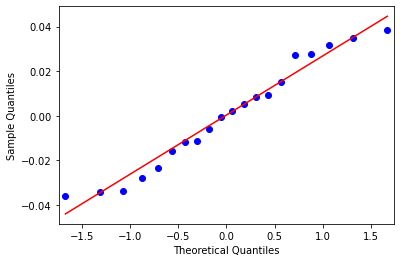

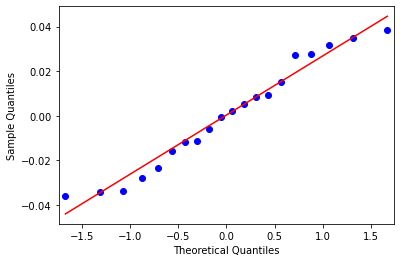

In [13]:
qqplot(reg_result.resid,line='q')

In [14]:
omni_normtest(reg_result.resid, axis=0)

NormaltestResult(statistic=2.6520485000450766, pvalue=0.26553084977986086)

### 결과
   1. y = 0.0026 + 0.0209 * Strength
       - 초코칩의 강도가 약 0.0026 증가할 때마다, 굽는 시간은 약 0.0209분 증가한다.